In [1]:
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # dataset
print(x_train.shape)  # shapes 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))   
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)    # flattened input
print(x_test.shape)

(60000, 784)
(10000, 784)


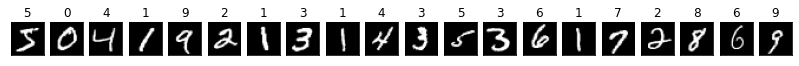

In [4]:
numbers=20
plt.figure(figsize=(14, 10))
for i in range(numbers):
        
    # display original
    ax = plt.subplot(2, numbers, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.xticks([]), plt.yticks([])
    plt.title(y_train[i])
    
plt.show()

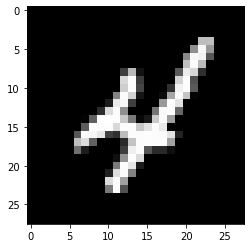

In [7]:
XX_train = x_train.astype('float32')/255.
XX_test = x_test.astype('float32')/255.
plt.imshow(XX_train[9].reshape(28,28))

In [8]:
def one_hot_encoding(y_train):                    # 1 hot encoding for 10 classes
    y = np.empty([len(y_train),10],dtype = int)
    for i in range(len(y_train)):
        a = y_train[i]
        b = np.zeros(10,dtype = int) 
        b[a] = 1
        y[i] = b
    return y.T

YY_train = one_hot_encoding(y_train)
YY_test = one_hot_encoding(y_test)

XX_train = XX_train.T
XX_test = XX_test.T

print(XX_train.shape)
print(YY_train.shape)
print(XX_test.shape)
print(YY_test.shape)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)


In [9]:
def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=0, keepdims=True)


In [10]:
def initialize_param(d):                  # parameter initilization
    np.random.seed(1)
    w = np.random.randn(d,10)/np.sqrt(d)
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

In [11]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
    return A, cost

In [12]:
def backprop(X, Y, A):
    m = X.shape[1]
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    return dw, db

In [13]:
def optimize(params, X, Y, num_iterations, l_rate):
    w = params['w']
    b = params['b']
    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)
        params['w'] = params['w'] - l_rate*dw
        params['b'] = params['b'] - l_rate*db
        if i%100 == 0:
            print('Cost on {0} interation: {1} {2} {3}'.format(i, cost, np.linalg.norm(dw), db))
        costs.append(cost)
    return params, costs

In [14]:
def predict(params, X):
    w = params['w']
    print(w.shape, X.shape)
    b = params['b']
    m = X.shape[1]
    A = softmax(np.dot(w.T,X)+b)
    return A

In [15]:
def model(ip_dimension, X_train, Y_train, num_interation, l_rate):
    parameters = initialize_param(ip_dimension)
    parameters, costs = optimize(parameters, X_train, Y_train, num_interation, l_rate)
    return parameters, costs

In [16]:
parameters, costs = model(XX_train.shape[0], XX_train, YY_train, 1000, 0.1)

Cost on 0 interation: 2.436488226563119 1.1366058666201924 -2.8776980798284056e-17
Cost on 100 interation: 0.6140793499129977 0.14731918378778483 2.220446049250313e-18
Cost on 200 interation: 0.4934911939243358 0.08265392383436176 7.105427357601002e-19
Cost on 300 interation: 0.4445869523096169 0.05938195955176011 1.2434497875801753e-18
Cost on 400 interation: 0.4166164790036122 0.0471843013929549 4.440892098500626e-19
Cost on 500 interation: 0.3979535328842856 0.03958973920139576 -3.552713678800501e-19
Cost on 600 interation: 0.38435610251548524 0.03436324055036924 -7.105427357601002e-19
Cost on 700 interation: 0.3738704917424687 0.030522324764162823 -1.8355687340469255e-18
Cost on 800 interation: 0.3654578661304489 0.027565765114281958 6.513308411134252e-19
Cost on 900 interation: 0.3585087183718252 0.02521028890483971 3.671137468093851e-18


In [17]:
print("Train accuracy: {} %".format(100 - np.mean(np.abs(predict(parameters,XX_train) - YY_train)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(predict(parameters,XX_test) - YY_test)) * 100))

(784, 10) (784, 60000)
Train accuracy: 96.20347450041757 %
(784, 10) (784, 10000)
Test accuracy: 96.35049632816649 %


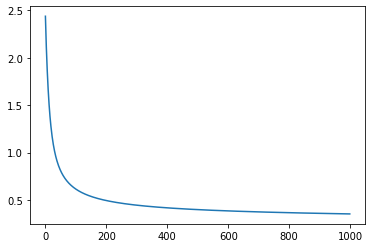

In [18]:
plt.plot(range(len(costs)),costs)